# An exploration of the cities I would like to live

In [4]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Import "quality of life" data and reformat country column by removing whtespace on lhs.

In [69]:
quality_of_life_filepath = "../input/city-quality-of-life-dataset/uaScoresDataFrame.csv"
quality_of_life_data = pd.read_csv(quality_of_life_filepath,index_col=0)
quality_of_life_data['UA_Country'] = quality_of_life_data['UA_Country'].str.lstrip()

0          Denmark
1        Australia
2       New Mexico
3       Kazakhstan
4      Netherlands
          ...     
261         Canada
262         Poland
263        Armenia
264        Croatia
265    Switzerland
Name: UA_Country, Length: 266, dtype: object

In [205]:
quality_of_life_data.head()

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Score,Score_1
0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,...,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300,93.262017,93.262017
1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310,87.305483,87.305483
2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,...,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155,76.559250,76.559250
3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,...,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000,82.886133,82.886133
4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,...,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070,99.604267,99.604267


Plot of the "cost of living" for all the data split across the continents. All the columns in the "quality of life" data are range from 0.0 - 10.0 with the larger numbers indicating higher desirability. For cost of living, we can see that the cities in Europe, North America and Asia have a large range in the "cost of living" whereas, Oceania is mid-range and South America and Africa are on average cheaper.    

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='UA_Continent', ylabel='Cost of Living'>

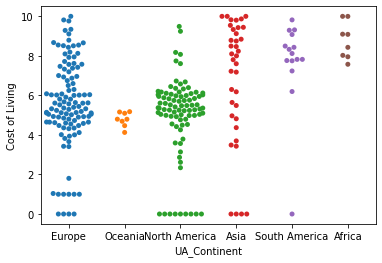

In [206]:
sns.swarmplot(x=quality_of_life_data["UA_Continent"],y=quality_of_life_data["Cost of Living"])

I calculated a score "Score_1" by weighting different columns from the "quality of life" data on how important each variable is to me. 

In [207]:
quality_of_life_data['Score_1'] = quality_of_life_data['Housing'] + quality_of_life_data['Cost of Living'] + (quality_of_life_data['Travel Connectivity']*0.9) + (quality_of_life_data['Safety']*0.9) + (quality_of_life_data['Healthcare']*0.8) + (quality_of_life_data['Education']*0.5) + (quality_of_life_data['Environmental Quality']*0.8) + (quality_of_life_data['Internet Access']*0.8) + (quality_of_life_data['Economy']*0.5) + (quality_of_life_data['Taxation']*0.5)+ (quality_of_life_data['Leisure & Culture']*2)+ (quality_of_life_data['Tolerance']*3)+ (quality_of_life_data['Outdoors']*2)

#missing climate and public transport and salary and unesco
#score out of 100

Plotting the distribution of scores across the continents, I can see that cities in Europe are on average scoring higher than the other continents and are more numerous. This is lucky as being European, I have a preference to stay within Europe.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='UA_Continent', ylabel='Score_1'>

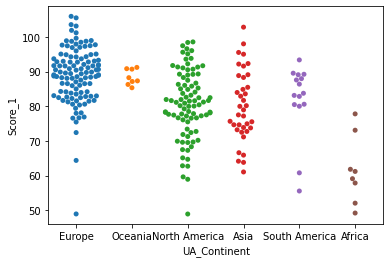

In [203]:
sns.swarmplot(x=quality_of_life_data["UA_Continent"],y=quality_of_life_data["Score_1"])

I limit the "quality of life" data down to Europe and create a list "country" for all the countries that feature.

In [208]:
Europe_quality = quality_of_life_data.loc[quality_of_life_data.UA_Continent == 'Europe']
Europe_quality

arr1 = Europe_quality.UA_Country.unique()
country = arr1.tolist()
#Italy_quality =  quality_of_life_data.loc[quality_of_life_data.UA_Country == 'Italy']
#UK_quality = Europe_quality.loc[Europe_quality.UA_Country == 'United Kingdom']

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Score,Score_1
0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,...,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300,93.262017,93.262017
4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,...,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070,99.604267,99.604267
6,Andorra,Andorra,Europe,3.9690,0.000,1.0000,0.000,0.5000,0.00000,0.000000,...,0.0000,7.25600,0.0000,4.4750,7.1860,2.1320,8.7035,3.5885,64.359750,64.359750
10,Athens,Greece,Europe,9.0525,6.500,4.4040,2.325,3.7070,5.21975,6.169000,...,3.1625,3.80225,3.3200,4.1665,2.2280,7.8760,6.2680,6.4830,88.364550,88.364550
18,Barcelona,Spain,Europe,6.3230,6.074,7.7585,5.655,5.8060,5.69925,7.119667,...,5.0290,3.66550,4.2960,3.8940,6.4680,8.5915,7.4715,5.8280,96.981617,96.981617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Vilnius,Lithuania,Europe,8.6210,7.576,4.2230,2.828,2.1050,5.92775,7.600333,...,3.7000,8.71775,4.6910,6.5925,7.9265,5.1985,7.3930,4.1060,92.722483,92.722483
258,Warsaw,Poland,Europe,7.8695,8.192,6.1215,1.853,3.8640,5.20300,5.704333,...,4.6685,6.38900,4.7615,5.0970,6.0000,7.3355,4.6360,4.9610,88.549683,88.549683
262,Wroclaw,Poland,Europe,8.4520,8.434,3.5860,2.386,2.2445,4.95475,5.704333,...,4.1615,4.96475,4.7615,5.0970,5.7615,4.7495,3.9045,4.0850,76.653567,76.653567
264,Zagreb,Croatia,Europe,8.9100,7.194,4.4530,1.775,2.0280,4.83000,5.720333,...,3.2110,7.33150,2.2365,7.9935,5.0335,4.9945,7.9545,4.8090,91.616750,91.616750


In [9]:
Europe_quality_scored=Europe_quality.sort_values(by=['Score'],ascending=False)
Europe_quality_scored[0:25]

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Score
256,Vienna,Austria,Europe,6.3140,5.111,5.7980,3.635,8.0315,6.21325,7.596000,...,8.198000,4.8545,9.27000,4.6630,2.6660,6.1730,8.5215,8.9640,5.2945,105.918750
165,Munich,Germany,Europe,4.2300,4.648,6.9150,6.509,8.0565,6.01400,9.072333,...,8.371000,7.5545,9.01825,5.3735,3.9035,5.1550,7.3360,8.4745,7.3310,105.481600
135,Lisbon,Portugal,Europe,6.7340,7.004,6.0220,3.194,4.1910,5.31575,8.238667,...,7.860333,4.4800,6.41150,3.4830,4.1575,6.3940,7.8335,9.5970,5.6910,103.537017
195,Prague,Czechia,Europe,7.4305,7.569,5.7795,2.302,5.4815,5.84650,6.212667,...,7.881000,4.2380,7.01425,4.3780,5.9335,6.0905,8.4645,8.1985,4.9010,103.116250
145,Madrid,Spain,Europe,6.4140,6.249,0.0000,4.790,5.8555,5.28575,7.119667,...,8.916333,4.2915,5.56550,4.2960,3.8940,6.2410,9.3380,7.6650,6.2200,101.876217
252,Valencia,Spain,Europe,8.1355,6.872,1.7470,2.583,3.4840,5.80900,7.119667,...,8.885667,4.2660,5.94225,4.2960,3.8940,9.1400,7.0780,7.9350,6.3315,101.177283
4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,...,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070,99.604267
193,Porto,Portugal,Europe,8.1095,7.422,4.3130,1.886,3.1115,5.46000,8.238667,...,8.166667,4.4490,7.03875,3.4830,4.1575,4.4945,5.6250,9.5735,5.9485,98.938083
136,Liverpool,United Kingdom,Europe,7.4850,6.020,3.5590,2.355,6.6495,4.54100,8.992000,...,9.027667,4.8720,7.27525,5.4380,5.9545,8.9940,5.3930,7.4510,5.4585,98.870983
69,Copenhagen,Denmark,Europe,4.2270,3.426,6.2070,4.467,6.3000,6.29550,9.940000,...,7.985333,5.3010,8.27225,4.8865,5.0680,7.2395,7.0630,9.0955,4.6710,98.740167


In [ ]:
Italy_quality.sort_values(by=['Score'],ascending=False)

In [ ]:
UK_quality.sort_values(by=['Score'],ascending=False)

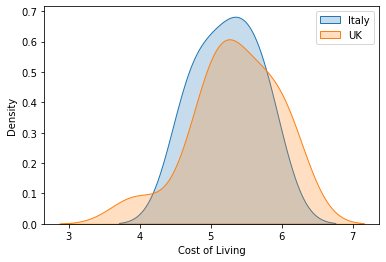

In [209]:
sns.kdeplot(data=Italy_quality['Cost of Living'],shade=True,label='Italy')
sns.kdeplot(data=UK_quality['Cost of Living'],shade=True,label='UK')
plt.legend()

In [ ]:
sns.kdeplot(data=Italy_quality['Housing'],shade=True,label='Italy')
sns.kdeplot(data=UK_quality['Housing'],shade=True,label='UK')
plt.legend()

In [ ]:
sns.swarmplot(x=Italy_quality['UA_Name'],y=Italy_quality['Cost of Living'])

In [ ]:
plt.figure(figsize=(15,4))
sns.swarmplot(x=UK_quality['UA_Name'],y=UK_quality['Cost of Living'])

In [ ]:
plt.figure(figsize=(15,4))
sns.swarmplot(x=UK_quality['UA_Name'],y=UK_quality['Housing'])

In [ ]:
sns.swarmplot(x=Italy_quality['UA_Name'],y=Italy_quality['Housing'])

In [ ]:
sns.kdeplot(data=Italy_quality['Score'],shade=True,label='Italy')
sns.kdeplot(data=UK_quality['Score'],shade=True,label='UK')
plt.legend()

In [ ]:
sns.swarmplot(x=Italy_quality['UA_Name'],y=Italy_quality['Score'])

In [ ]:
plt.figure(figsize=(15,4))
sns.swarmplot(x=UK_quality['UA_Name'],y=UK_quality['Score'])

I would like to live in a reasonably warm climate so added a climate variable. Ideal summer temp = average over July and August 20oC. Ideal winter temp = 5 oC over jan and feb

In [221]:
world_temp_filepath = '../input/world-average-temperature/Avg_World_Temp_2020.csv'
world_temp_data = pd.read_csv(world_temp_filepath,index_col = 0)
world_temp_data

Europe_temp = world_temp_data.loc[world_temp_data.Continent == "Europe"]
Europe_temp['summer'] = (Europe_temp.Jul + Europe_temp.Aug)/2
Europe_temp['winter'] = (Europe_temp.Jan + Europe_temp.Feb)/2
Europe_temp.sort_values(by=['summer'],ascending=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg_Year,Continent,summer,winter
191,Cyprus,Nicosia,10.6,10.6,13.1,17.1,22.3,26.9,29.7,29.4,26.2,22.3,16.3,12.0,19.7,Europe,29.55,10.60
202,Greece,Athens,10.2,10.9,13.2,16.9,21.8,26.6,29.3,29.3,25.0,20.1,15.5,11.5,19.2,Europe,29.30,10.55
203,Greece,Piraeus,11.1,11.2,13.3,16.9,21.4,26.3,29.0,28.8,25.2,20.6,15.8,12.6,19.4,Europe,28.90,11.15
237,Spain,Seville,11.0,12.5,15.6,17.3,20.7,25.1,28.2,27.9,25.0,20.2,15.1,11.9,19.2,Europe,28.05,11.75
214,Malta,Valletta,12.8,12.8,13.3,15.6,18.9,22.8,26.1,26.7,23.9,21.1,17.2,13.9,18.8,Europe,26.40,12.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Russia,Arkhangelsk,-12.7,-11.4,-5.5,0.4,6.9,13.0,16.3,13.1,8.2,2.3,-5.1,-9.8,1.3,Europe,14.70,-12.05
219,Norway,Bergen,1.5,1.6,3.3,5.9,10.5,13.5,14.5,14.4,11.5,8.7,4.7,2.6,7.7,Europe,14.45,1.55
227,Russia,Murmansk,-10.1,-9.7,-5.5,-0.7,4.0,9.2,12.8,11.1,7.0,1.5,-4.8,-8.2,0.6,Europe,11.95,-9.90
221,Norway,Tromsø,-3.8,-3.7,-2.3,0.7,5.1,9.2,11.8,10.9,6.9,3.2,-0.6,-2.7,2.9,Europe,11.35,-3.75


In [220]:
Europe_temp.loc[Europe_temp.Country == 'Italy']

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg_Year,Continent,summer,winter
207,Italy,Milan,2.5,4.7,9.0,12.2,17.0,20.8,23.6,23.0,19.2,13.4,7.2,3.3,13.0,Europe,21.650,4.875
208,Italy,Rome,7.5,8.2,10.2,12.6,17.2,21.1,24.1,24.5,20.8,16.4,11.4,8.4,15.2,Europe,22.625,8.575


In [123]:
surface_temp_country_filepath = "../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv"
country_temp_data = pd.read_csv(surface_temp_country_filepath,index_col="dt")
country_temp_data
Italy_temps = country_temp_data.loc[country_temp_data.Country == "Italy"]
Italy_temps.tail(25)
#sns.lineplot(data=Italy_temps)
#Italy_quality =  quality_of_life_data.loc[quality_of_life_data.UA_Country == ' Italy']

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
2011-09-01,21.383,0.261,Italy
2011-10-01,14.284,0.174,Italy
2011-11-01,10.125,0.357,Italy
2011-12-01,7.041,0.386,Italy
2012-01-01,4.871,0.350,Italy
2012-02-01,3.019,0.101,Italy
2012-03-01,10.726,0.291,Italy
2012-04-01,11.871,0.351,Italy
2012-05-01,16.126,0.358,Italy


In [ ]:
UK_temps = country_temp_data.loc[country_temp_data.Country == "United Kingdom"]
UK_temps.tail(25)

In [11]:
unesco_filepath = "../input/unesco-world-heritage-sites/whc-sites-2019.csv"
unesco_data = pd.read_csv(unesco_filepath,index_col="id_no")

Italy_unesco = unesco_data.loc[unesco_data.states_name_en == "Italy"]
Italy_unesco.describe()
#Italy_unesco_natural = Italy_unesco.loc[Italy_unesco.category == "Natural"]
#Italy_unesco_natural

,unique_number,date_inscribed,danger,date_end,longitude,latitude,area_hectares,transboundary
count,49.000000,49.000000,49.0,0.0,49.000000,49.000000,49.000000,49.0
mean,1207.918367,1999.265306,0.0,NaN,12.223694,42.811498,10175.689047,0.0
std,535.097843,8.833590,0.0,NaN,2.337885,2.837499,31481.198542,0.0
min,100.000000,1979.000000,0.0,NaN,7.685720,36.893194,0.000000,0.0
25%,931.000000,1996.000000,0.0,NaN,10.925680,40.782500,8.920000,0.0
50%,993.000000,1997.000000,0.0,NaN,12.163056,43.723056,125.400000,0.0
75%,1558.000000,2004.000000,0.0,NaN,14.262778,45.399111,1016.000000,0.0
max,2327.000000,2019.000000,0.0,NaN,17.236940,46.613056,159109.730000,0.0


Split country column such that when a UNESCO site is shared by multiple, each country has an entry

In [126]:
unesco_data_split = unesco_data.assign(states_name_en = unesco_data.states_name_en.str.split(',')).explode('states_name_en')
unesco_europe_NA_split = unesco_data_split.loc[unesco_data_split.region_en == "Europe and North America"]
unesco_europe_NA_split = unesco_europe_NA_split.replace(['United Kingdom of Great Britain and Northern Ireland','North Macedonia','Russian Federation','Republic of Moldova'],['United Kingdom','Macedonia','Russia','Moldova'])

unesco_europe_D = unesco_europe.to_dict()
unesco_europe_D 

#unesco_countries_europe.sort()
#unesco_europe_F = unesco_europe.to_frame()
#unesco_europe_F = unesco_europe_F.rename(columns={'states_name_en' : 'unesco'})
#unesco_europe_F = unesco_europe_F.rename(columns={'' : 'Country'})
#unesco_europe_F
#unesco_europe_F = unesco_europe_F.set_index()

{'Italy': 55,
 'Spain': 48,
 'Germany': 45,
 'France': 44,
 'United Kingdom': 32,
 'Russia': 27,
 'United States of America': 24,
 'Canada': 20,
 'Greece': 18,
 'Turkey': 18,
 'Portugal': 17,
 'Poland': 16,
 'Sweden': 15,
 'Czechia': 14,
 'Belgium': 12,
 'Switzerland': 11,
 'Croatia': 10,
 'Netherlands': 10,
 'Austria': 10,
 'Denmark': 10,
 'Bulgaria': 10,
 'Israel': 9,
 'Hungary': 8,
 'Romania': 8,
 'Norway': 8,
 'Finland': 7,
 'Ukraine': 7,
 'Slovakia': 7,
 'Serbia': 5,
 'Slovenia': 4,
 'Albania': 4,
 'Montenegro': 4,
 'Lithuania': 4,
 'Belarus': 4,
 'Cyprus': 3,
 'Georgia': 3,
 'Malta': 3,
 'Iceland': 3,
 'Bosnia and Herzegovina': 3,
 'Armenia': 3,
 'Azerbaijan': 3,
 'Estonia': 2,
 'Holy See': 2,
 'Ireland': 2,
 'Latvia': 2,
 'Macedonia': 1,
 'Moldova': 1,
 'San Marino': 1,
 'Luxembourg': 1,
 'Andorra': 1}

In [158]:
arr2 = unesco_europe_NA_split.states_name_en.unique()
unesco_europe = arr2.tolist()
unesco_europe 
#unesco_data_split
#arr1 = Europe_quality.UA_Country.unique()
#country = arr1.tolist() 

['Albania',
 'Andorra',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Canada',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Holy See',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Montenegro',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'United States of America',
 'Macedonia',
 'Moldova']

In [125]:
unesco_europe_D['Italy']

55

In [201]:
Europe_quality['unesco'] = Europe_quality['UA_Country'].map(unesco_europe_D)
Europe_quality
#Europe_quality['unesco'].unique()

Europe_quality['unesco'] = Europe_quality['unesco'].fillna(0.0)
Europe_quality[Europe_quality.unesco.isnull()]
Europe_quality

                              
#Europe_quality['unesco'] = Europe_quality['UA_Country'].isin(unesco_europe)

#for ind in Europe_quality.index:
#if Europe_quality['unesco'] == True:
#        Europe_quality['unesco'] = unesco_europe_D[Europe_quality['UA_Country']]
    #else:
        #Europe_quality['unesco'] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,unesco
0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,...,8.704333,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300,10.0
4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,...,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070,10.0
6,Andorra,Andorra,Europe,3.9690,0.000,1.0000,0.000,0.5000,0.00000,0.000000,...,0.000000,0.0000,7.25600,0.0000,4.4750,7.1860,2.1320,8.7035,3.5885,1.0
10,Athens,Greece,Europe,9.0525,6.500,4.4040,2.325,3.7070,5.21975,6.169000,...,7.153000,3.1625,3.80225,3.3200,4.1665,2.2280,7.8760,6.2680,6.4830,18.0
18,Barcelona,Spain,Europe,6.3230,6.074,7.7585,5.655,5.8060,5.69925,7.119667,...,8.403333,5.0290,3.66550,4.2960,3.8940,6.4680,8.5915,7.4715,5.8280,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Vilnius,Lithuania,Europe,8.6210,7.576,4.2230,2.828,2.1050,5.92775,7.600333,...,6.330667,3.7000,8.71775,4.6910,6.5925,7.9265,5.1985,7.3930,4.1060,4.0
258,Warsaw,Poland,Europe,7.8695,8.192,6.1215,1.853,3.8640,5.20300,5.704333,...,6.881667,4.6685,6.38900,4.7615,5.0970,6.0000,7.3355,4.6360,4.9610,16.0
262,Wroclaw,Poland,Europe,8.4520,8.434,3.5860,2.386,2.2445,4.95475,5.704333,...,6.781333,4.1615,4.96475,4.7615,5.0970,5.7615,4.7495,3.9045,4.0850,16.0
264,Zagreb,Croatia,Europe,8.9100,7.194,4.4530,1.775,2.0280,4.83000,5.720333,...,7.266000,3.2110,7.33150,2.2365,7.9935,5.0335,4.9945,7.9545,4.8090,10.0


In [183]:
Italy_quality['unesco'] = Italy_quality['UA_Country'].map(unesco_europe_D)
Italy_quality

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,unesco
33,Bologna,Italy,Europe,7.4720,5.189,3.1485,1.397,3.6820,5.53000,6.189667,...,8.577667,4.2025,5.46025,3.3625,2.4365,7.7105,5.7360,7.6180,1.5815,55
87,Florence,Italy,Europe,6.7750,4.649,2.2275,0.000,4.3060,6.02875,6.189667,...,8.163667,4.0580,6.00900,3.3625,2.4365,4.4415,8.5035,6.7355,1.6770,55
157,Milan,Italy,Europe,5.1945,4.801,5.1905,3.286,6.6830,5.51200,6.189667,...,8.444667,4.2830,4.45800,3.3625,2.4365,5.0140,7.9170,7.2195,5.6410,55
168,Naples,Italy,Europe,8.2150,5.810,2.0405,0.000,3.9410,4.70575,6.189667,...,7.186333,4.0580,1.65625,3.3625,2.4365,5.3140,6.0450,6.7535,5.3590,55
206,Rome,Italy,Europe,5.6025,5.323,4.6745,1.013,6.4335,4.53325,6.189667,...,7.863667,4.1570,4.27650,3.3625,2.4365,4.4910,9.1100,6.2215,6.3960,55
248,Turin,Italy,Europe,8.0695,5.612,3.2500,0.000,3.1495,5.60925,6.189667,...,8.367667,4.1015,3.88550,3.3625,2.4365,2.3690,7.0610,5.7770,5.7050,55


In [164]:
for ind in Europe_quality.index:
    if Europe_quality['UA_Country'] in unesco_europe:
        Europe_quality['unesco'] = unesco_europe_D[Europe_quality['UA_Country']]
    else:
        Europe_quality['unesco'] = 0
        
Europe_quality
#[[i] for i in range(len(Europe_quality)])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [107]:
Italy_unesco_split = unesco_data_split.loc[unesco_data_split.states_name_en == "Italy"]
Italy_unesco_split

,category,states_name_en,region_en,unique_number,rev_bis,name_en,short_description_en,justification_en,date_inscribed,secondary_dates,...,date_end,danger_list,longitude,latitude,area_hectares,criteria_txt,category_short,iso_code,udnp_code,transboundary
id_no,,,,,,,,,,,,,,,,,,,,,
93,Cultural,Italy,Europe and North America,100,NaN,Church and Dominican Convent of Santa Maria de...,The refectory of the Convent of Santa Maria d...,NaN,1980,NaN,...,NaN,NaN,9.170500,45.465889,1.5000,(i)(ii),C,it,ita,0
94,Cultural,Italy,Europe and North America,101,NaN,Rock Drawings in Valcamonica,"Valcamonica, situated in the Lombardy plain, ...",NaN,1979,NaN,...,NaN,NaN,10.297333,45.957056,432.3000,(iii)(vi),C,it,ita,0
174,Cultural,Italy,Europe and North America,2127,NaN,Historic Centre of Florence,"Built on the site of an Etruscan settlement, ...",NaN,1982,NaN,...,NaN,NaN,11.256110,43.773060,505.0000,(i)(ii)(iii)(iv)(vi),C,it,ita,0
175,Cultural,Italy,Europe and North America,1891,NaN,Medici Villas and Gardens in Tuscany,Twelve villas and two gardens spread across t...,NaN,2013,NaN,...,NaN,NaN,11.304167,43.857778,125.4000,(ii)(iv)(vi),C,it,ita,0
394,Cultural,Italy,Europe and North America,454,NaN,Venice and its Lagoon,Founded in the 5th century and spread over 11...,NaN,1987,NaN,...,NaN,NaN,12.338944,45.434306,0.0000,(i)(ii)(iii)(iv)(v)(vi),C,it,ita,0
395,Cultural,Italy,Europe and North America,1558,Bis,"Piazza del Duomo, Pisa","Standing in a large green expanse, Piazza del ...",NaN,1987,NaN,...,NaN,NaN,10.396389,43.723056,8.8700,(i)(ii)(iv)(vi),C,it,ita,0
398,Cultural,Italy,Europe and North America,459,rev,Castel del Monte,When the Emperor Frederick II built this cast...,The Committee decided to inscribe the nominat...,1996,NaN,...,NaN,NaN,16.270944,41.084806,3.1000,(i)(ii)(iii),C,it,ita,0
549,Cultural,Italy,Europe and North America,646,rev,18th-Century Royal Palace at Caserta with the ...,"The monumental complex at Caserta, created by...",The Committee decided to inscribe this proper...,1997,NaN,...,NaN,NaN,14.326390,41.073330,87.3700,(i)(ii)(iii)(iv),C,it,ita,0
550,Cultural,Italy,Europe and North America,647,NaN,Historic Centre of San Gimignano,'San Gimignano delle belle Torri' is in Tusca...,NaN,1990,NaN,...,NaN,NaN,11.041670,43.468060,13.8800,(i)(iii)(iv),C,it,ita,0


In [8]:
UK_unesco = unesco_data.loc[unesco_data.states_name_en == "United Kingdom of Great Britain and Northern Ireland"]
UK_unesco
#UK_unesco_natural = UK_unesco.loc[UK_unesco.category == "Natural"]
#UK_unesco_natural

,category,states_name_en,region_en,unique_number,rev_bis,name_en,short_description_en,justification_en,date_inscribed,secondary_dates,...,date_end,danger_list,longitude,latitude,area_hectares,criteria_txt,category_short,iso_code,udnp_code,transboundary
id_no,,,,,,,,,,,,,,,,,,,,,
369,Natural,United Kingdom of Great Britain and Northern I...,Europe and North America,2178,NaN,Giant's Causeway and Causeway Coast,The Giant's Causeway lies at the foot of the ...,NaN,1986,NaN,...,NaN,NaN,-6.485278,55.250000,239.4050,(vii)(viii),N,gb,gbr,0
370,Cultural,United Kingdom of Great Britain and Northern I...,Europe and North America,1634,Bis,Durham Castle and Cathedral,Durham Cathedral was built in the late 11th a...,NaN,1986,NaN,...,NaN,NaN,-1.576111,54.774722,8.7900,(ii)(iv)(vi),C,gb,gbr,0
371,Cultural,United Kingdom of Great Britain and Northern I...,Europe and North America,425,NaN,Ironbridge Gorge,Ironbridge is known throughout the world as t...,NaN,1986,NaN,...,NaN,NaN,-2.472778,52.626389,547.9000,(i)(ii)(iv)(vi),C,gb,gbr,0
372,Cultural,United Kingdom of Great Britain and Northern I...,Europe and North America,1930,Bis,Studley Royal Park including the Ruins of Foun...,In the 18th century a designed landscape of e...,NaN,1986,NaN,...,NaN,NaN,-1.573056,54.116111,310.0000,(i)(iv),C,gb,gbr,0
373,Cultural,United Kingdom of Great Britain and Northern I...,Europe and North America,1633,Bis,"Stonehenge, Avebury and Associated Sites","Stonehenge and Avebury, in Wiltshire, are amo...",NaN,1986,NaN,...,NaN,NaN,-1.825278,51.178889,4985.4000,(i)(ii)(iii),C,gb,gbr,0
374,Cultural,United Kingdom of Great Britain and Northern I...,Europe and North America,429,NaN,Castles and Town Walls of King Edward in Gwynedd,The castles of Beaumaris and Harlech (largely...,NaN,1986,NaN,...,NaN,NaN,-4.276944,53.139722,6.0000,(i)(iii)(iv),C,gb,gbr,0
387,Mixed,United Kingdom of Great Britain and Northern I...,Europe and North America,2202,NaN,St Kilda,"This volcanic archipelago, with its spectacul...",NaN,1986,"2004, 2005",...,NaN,NaN,-8.576667,57.817222,24201.4004,(iii)(v)(vii)(ix)(x),M,gb,gbr,0
422,Cultural,United Kingdom of Great Britain and Northern I...,Europe and North America,2171,NaN,The English Lake District,"Located in northwest England, the English Lak...",NaN,2017,NaN,...,NaN,NaN,-3.082417,54.476611,229205.1900,(ii)(v)(vi),C,gb,gbr,0
425,Cultural,United Kingdom of Great Britain and Northern I...,Europe and North America,492,NaN,Blenheim Palace,"Blenheim Palace, near Oxford, stands in a rom...",NaN,1987,NaN,...,NaN,NaN,-1.361389,51.841944,0.0000,(ii)(iv),C,gb,gbr,0


In [90]:
unesco_europe_NA = unesco_data.loc[unesco_data.region_en == "Europe and North America"]
#unesco_europe_NA
#unesco_country = unesco_europe_NA.groupby(['states_name_en']).size()
#unesco_country
unesco_country.value_counts

<bound method IndexOpsMixin.value_counts of states_name_en
Albania                                                                                            2
Albania,Austria,Belgium,Bulgaria,Croatia,Germany,Italy,Romania,Slovakia,Slovenia,Spain,Ukraine     1
Albania,North Macedonia                                                                            1
Andorra                                                                                            1
Armenia                                                                                            3
                                                                                                  ..
Switzerland                                                                                        8
Turkey                                                                                            18
Ukraine                                                                                            4
United Kingdom of Great Britain 

In [42]:
n_unesco_cntry=[]
for c in country:
    n_unesco_cntry = unesco_europe_NA_split.states_name_en.map(lambda state: "c" in state).sum()
print(n_unesco_cntry)
#n_unesco_cntry
#country_counts = pd.Series([n_unesco_cntry],index = [country])
#country_counts
    #n_unesco_Italy = unesco_europe_NA.states_name_en.map(lambda state: "Italy" in state).sum()


104
